In [58]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Importing data**

In [59]:
#Importing data
data=pd.read_csv('/content/employee.csv')
print(data)

            name   age   income gender  department grade  performance_score
0    Allen Smith  45.0      NaN    NaN  Operations    G3                723
1        S Kumar   NaN  16000.0      F     Finance    G0                520
2    Jack Morgan  32.0  35000.0      M     Finance    G2                674
3      Ying Chin  45.0  65000.0      F       Sales    G3                556
4  Dheeraj Patel  30.0  42000.0      F  Operations    G2                711
5  Satyam Sharma   NaN  62000.0    NaN       Sales    G3                649
6   James Authur  54.0      NaN      F  Operations    G3                 53
7     Josh Wills  54.0  52000.0      F     Finance    G3                901
8       Leo Duck  23.0  98000.0      M       Sales    G4                709


**Basic Details of dataset**

In [60]:
#To find the number of rows and columns
data.shape

(9, 7)

In [61]:
#To get an overall information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


**Reset the index as "name"**

In [62]:
data=pd.read_csv('/content/employee.csv',index_col='name')
print(data)

                age   income gender  department grade  performance_score
name                                                                    
Allen Smith    45.0      NaN    NaN  Operations    G3                723
S Kumar         NaN  16000.0      F     Finance    G0                520
Jack Morgan    32.0  35000.0      M     Finance    G2                674
Ying Chin      45.0  65000.0      F       Sales    G3                556
Dheeraj Patel  30.0  42000.0      F  Operations    G2                711
Satyam Sharma   NaN  62000.0    NaN       Sales    G3                649
James Authur   54.0      NaN      F  Operations    G3                 53
Josh Wills     54.0  52000.0      F     Finance    G3                901
Leo Duck       23.0  98000.0      M       Sales    G4                709


**Select rows for specific names Jack Morgan and Josh wills**

In [63]:
data.loc[['Jack Morgan','Josh Wills']]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


**Select data for multiple values "Sales" and “Finance”.**

In [64]:
data[(data['department']=='Sales') | (data['department']=='Finance')]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


**Display employee who has more than 700 performance score.**

In [65]:
data[data['performance_score']>700]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


**Display employee who has more than 500 and less than 700 performance score**

In [66]:
data[(data['performance_score']>500)&(data['performance_score']<700)]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


**Check and handle missing values in the dataset.**

In [67]:
#Finding the count of missing values in each column
data.isna().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [68]:
#Finding datatypes of columns
data.dtypes

age                  float64
income               float64
gender                object
department            object
grade                 object
performance_score      int64
dtype: object

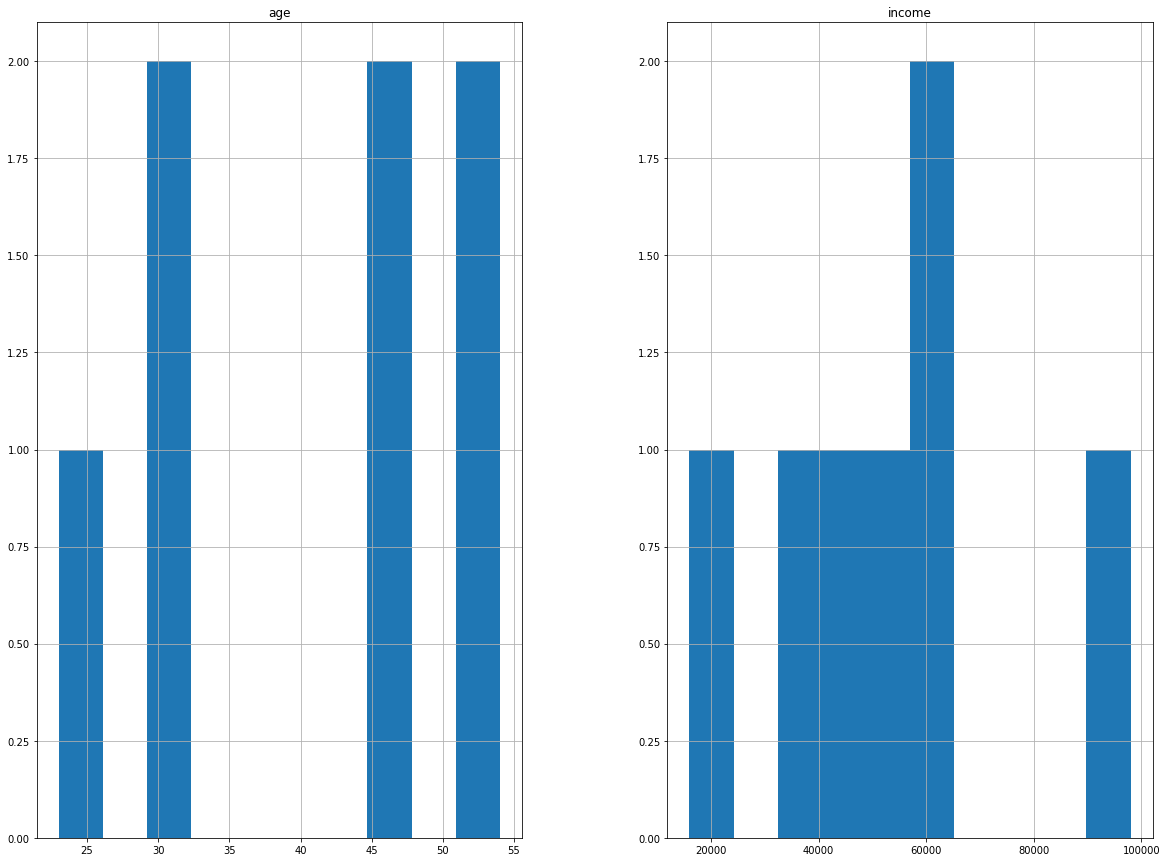

In [69]:
#Check skewness of numerical data
freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [70]:
#Since a normally distributed data pattern is observed,mean can be used for filling
for i in ['age','income']:
    data[i]=data[i].fillna(data[i].mean())
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.000000,52857.142857,NaN,Operations,G3,723
S Kumar,40.428571,16000.000000,F,Finance,G0,520
Jack Morgan,32.000000,35000.000000,M,Finance,G2,674
Ying Chin,45.000000,65000.000000,F,Sales,G3,556
Dheeraj Patel,30.000000,42000.000000,F,Operations,G2,711
Satyam Sharma,40.428571,62000.000000,NaN,Sales,G3,649
James Authur,54.000000,52857.142857,F,Operations,G3,53
Josh Wills,54.000000,52000.000000,F,Finance,G3,901
Leo Duck,23.000000,98000.000000,M,Sales,G4,709


In [71]:
#Using fillna() for replacing missing gender values with mode value
data.fillna(data['gender'].mode()[0], inplace=True)

In [85]:
#check for missing values
data.isna().sum()

age                  0
income               0
department           0
grade                0
performance_score    0
gender_F             0
gender_M             0
dtype: int64

**Check the outliers and handle outliers in performance score using Percentiles.**

Text(0.5, 1.0, 'Boxplot of performance_score')

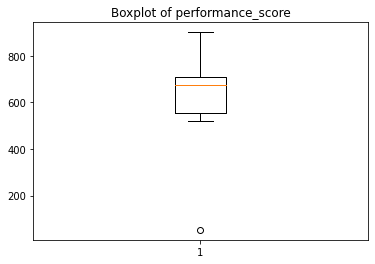

In [72]:
#outlier handling in performancescore column
plt.boxplot(data['performance_score'])
plt.title('Boxplot of performance_score')

In [73]:
#Computation of Q1,Q2,Q3
Q1=np.percentile(data['performance_score'],25,interpolation='midpoint')
Q2=np.percentile(data['performance_score'],50,interpolation='midpoint')
Q3=np.percentile(data['performance_score'],75,interpolation='midpoint')
print(Q1,Q2,Q3)

556.0 674.0 711.0


In [74]:
#Computation of IQR,lower limit and upper limit
IQR=Q3-Q1
ll=Q1-1.5*IQR
ul=Q3+1.5*IQR
print(ll,ul)

323.5 943.5


In [75]:
#Identifying outlier values
outliers=[]
for x in data['performance_score']:
    if (x>ul)or(x<ll):
        outliers.append(x)
print(outliers)

[53]


In [76]:
#locating outlier position
ind=data['performance_score']<ll
data.loc[ind].index

Index(['James Authur'], dtype='object', name='name')

In [77]:
data.drop(['James Authur'],inplace=True)
print(data)

                     age        income gender  department grade  \
name                                                              
Allen Smith    45.000000  52857.142857      F  Operations    G3   
S Kumar        40.428571  16000.000000      F     Finance    G0   
Jack Morgan    32.000000  35000.000000      M     Finance    G2   
Ying Chin      45.000000  65000.000000      F       Sales    G3   
Dheeraj Patel  30.000000  42000.000000      F  Operations    G2   
Satyam Sharma  40.428571  62000.000000      F       Sales    G3   
Josh Wills     54.000000  52000.000000      F     Finance    G3   
Leo Duck       23.000000  98000.000000      M       Sales    G4   

               performance_score  
name                              
Allen Smith                  723  
S Kumar                      520  
Jack Morgan                  674  
Ying Chin                    556  
Dheeraj Patel                711  
Satyam Sharma                649  
Josh Wills                   901  
Leo Duck      

**Check the gender column and do Dummy encoding.**

In [78]:
data.gender.nunique()

2

In [79]:
data=pd.get_dummies(data,columns=['gender'])
data

,age,income,department,grade,performance_score,gender_F,gender_M
name,,,,,,,
Allen Smith,45.000000,52857.142857,Operations,G3,723,1,0
S Kumar,40.428571,16000.000000,Finance,G0,520,1,0
Jack Morgan,32.000000,35000.000000,Finance,G2,674,0,1
Ying Chin,45.000000,65000.000000,Sales,G3,556,1,0
Dheeraj Patel,30.000000,42000.000000,Operations,G2,711,1,0
Satyam Sharma,40.428571,62000.000000,Sales,G3,649,1,0
Josh Wills,54.000000,52000.000000,Finance,G3,901,1,0
Leo Duck,23.000000,98000.000000,Sales,G4,709,0,1


In [80]:
#creating X 
X=data['performance_score']


**standard scaling on the feature performance score**

In [81]:
X.describe() 

count      8.00000
mean     680.37500
std      116.16729
min      520.00000
25%      625.75000
50%      691.50000
75%      714.00000
max      901.00000
Name: performance_score, dtype: float64

In [82]:
type(X)

pandas.core.series.Series

In [83]:
from sklearn import preprocessing
stdn=preprocessing.StandardScaler()
X=np.array(X).reshape(-1,1)
X=stdn.fit_transform(X)
X=pd.DataFrame(X)
print(X)

          0
0  0.392262
1 -1.475872
2 -0.058667
3 -1.144578
4  0.281831
5 -0.288733
6  2.030331
7  0.263425


In [84]:
#Scaled details
X.describe()

,0
count,8.000000e+00
mean,4.857226e-17
std,1.069045e+00
min,-1.475872e+00
25%,-5.026938e-01
50%,1.023793e-01
75%,3.094385e-01
max,2.030331e+00
